# **Introdução ao Aprendizado Não Supervisionado**

O aprendizado não supervisionado é outra vertente da aprendizagem supervisionada porque não temos registro ou não conhecemos os valores das respostas, ou das variáveis dependentes.

Ou seja, temos acesso apenas aos dados dos atributos de cada registro. Isso nos limita no sentido de que não podemos mais estimar modelos preditivos.

Mesmo quando conhecemos os valores das variáveis alvo, o foco do aprendizado não supervisionado geralmente é na parte de análise exploratória de dados. Trabalhamos, portanto, na determinação da **estrutura dos dados**.

Dentre as aplicações mais comuns do aprendizado não supervisionado, encontram-se:

- segmentação e *profiling* de clientes
- detecção de anomalias e de *outliers*
- redução da dimensionalidade para compressão de dados.

### **Principais Tipos de Modelos Não-Supervisionados**

Os modelos de não-supervisionados geralmente são diferenciados pelo método com que a estrutura dos dados é identificada:

- **Modelos baseados em distâncias** - os modelos baseados em distâncias usam essas métricas para mensurar o grau de similaridade entre os grupos de dados. São bem simples de entender e de se treinar, mas dependem do conhecimento de negócios para a determinação prévia do número de grupos.
  - *KMeans*
  - *KMedians*
  - Clusterização Hierárquica
- **Modelos baseadas em Densidade** - a determinação dos grupos é realizada pela análise da densidade de pontos presentes em cada região do espaço de atributos. Geralmente são dependem de determinação prévia de número de grupos mas são bem sensíveis à escolha dos hiperparâmetros.
  - DBSCAN - *Density-Based Spatial Clustering for Applications with Noise*
  - GMM - *Gaussian Mixture Models*
- **Redução de Dimensionalidade por projeção** - não é, a princípio, um método de determinação de grupos. Trata-se de um método de redução de dimensionalidade com preservação da informação, ou seja, são métodos onde conseguimos utilizar menos colunas do nosso conjunto de dados, porém sem perder demais a informação contida nos dados originais.
  - PCA - *Principal Component Analysis*
  - Kernel PCA

### **Principais Métricas para Aprendizado Não-Supervisionado**

Falar em métricas em aprendizado não supervisionado deve ser encarado com cautela. Como vamos analisar desempenho de um modelo se não conhecemos a resposta do problema?

Geralmente as métricas de aprendizado não supervisionado estão mais relacionadas à distribuição dos dados no espaço de atributos.

Vejamos as principais:

- **Score de Silhueta:** muito utilizado para problemas não-supervisionados "puros", ou seja, quando realmente não conhecemos os valores das respostas. Ela mede a similaridade de um determinado registro em relação àquele grupo que foi atribuído (a *coesão*). Varia entre -1 a 1, sendo que um valor grande e positivo aponta que o registro está bem alocado no grupo selecionado e que ele não se adequa a nenhum outro grupo.

$$s(i) = \frac{b(i) - a(i)}{\max[a(i), b(i)]}$$

- Onde:
  - $a(i)$ é a distância média do ponto $i$ até todos os pontos **pertencentes ao mesmo grupo** que o ponto $i$ foi alocado. Um baixo valor $a(i)$ mostra que o ponto se encontra num grupo bem denso e coeso
  - $b(i)$ é a menor distância do ponto $i$ até os pontos dos **outros grupos que não são os mesmos àquele** que o ponto $i$ foi atribuído. Um alto valor $b(i)$ sugere que os grupos estão bem afastados uns dos outros.

- **Homogeneidade, Complitude e V-Score**: são métricas que só podem ser utilizadas quando temos um problema *semi-supervisionado*. Ou seja, quando possuímos os valores das respostas do problema (*targets*), mas nosso objetivo não é criar modelos preditivos, mas sim entender a estrutura de dados.
  - **Homogeneidade**: olha do ponto de vista dos grupos. Verifica se cada grupo contém apenas elementos de uma mesma classe conhecida. Ou seja, analisa a pureza da distribuição *intra-grupos*
  - **Complitude**: olha do ponto de vista das classes e verifica se os elementos de cada classe conhecida foram atribuídos num mesmo grupo. É uma forma de analisar a distribuição *inter-grupos*
  - A métrica do **V-Score** funciona como uma analogia ao F1-Score dos problemas de classificação, representando a média harmônica entre homogeneidade e complitude.

  $$v = \frac{(1+\beta) h c}{\beta h  + c}$$

  Onde: $\beta$ controla a importância dado ao atributo da complitude.

In [20]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [2]:
# montar o drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# procurando e carregando arquivos
FILEPATH = '/content/drive/MyDrive/Bootcamp_DataScience/AlgoritmosInteligenciaArtificialClassificacao/datasets'
data = pd.read_csv(os.path.join(FILEPATH, 'german_credit.csv'))
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [8]:
# modificar os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(1)

,creditability,account_balance,duration_of_credit_(month),payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,...,duration_in_current_address,most_valuable_available_asset,age_(years),concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1


In [9]:
# vamos inicar utilizando somente duas variáveis
cols = ['duration_of_credit_(month)', 'credit_amount']
data_clust = data[cols]
data_clust.head()

,duration_of_credit_(month),credit_amount
0,18,1049
1,9,2799
2,12,841
3,12,2122
4,12,2171


In [10]:
# analisando ordem de grandeza
data_clust.describe()

,duration_of_credit_(month),credit_amount
count,1000.000000,1000.00000
mean,20.903000,3271.24800
std,12.058814,2822.75176
min,4.000000,250.00000
25%,12.000000,1365.50000
50%,18.000000,2319.50000
75%,24.000000,3972.25000
max,72.000000,18424.00000


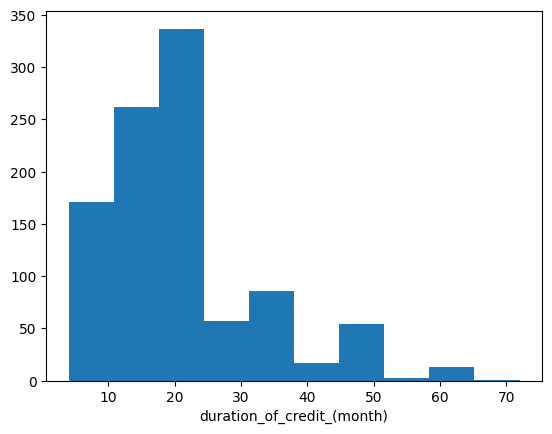

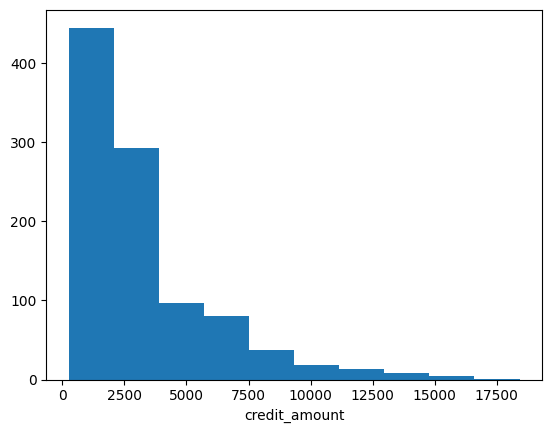

In [13]:
# analisar a distribuição dos dados
plt.figure()
plt.hist(data_clust['duration_of_credit_(month)'])
plt.xlabel('duration_of_credit_(month)')
plt.show()

plt.figure()
plt.hist(data_clust['credit_amount'])
plt.xlabel('credit_amount')
plt.show()

- verificamos que ambas as variáveis possuem um comportamento bem assimétrico de forma que não se recomenda utilizar escalonadores de padronização ou normalização. Vamos usar a abordagem da padronização robusta.

In [16]:
# criar um pipeline de modelagem
# usando uma hipótese de negócios (audaciosos x cuidadosos)
kmeans = Pipeline([
    ('scaler', RobustScaler()),
    ('kmeans', KMeans(n_clusters=4))
])

kmeans.fit(data_clust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', RobustScaler()), ('kmeans', KMeans(n_clusters=4))])

In [17]:
# atribuir cada linha para cada grupo
data_clust['grupo'] = kmeans['kmeans'].labels_
data_clust.head()

<ipython-input-17-89d6fb66e5a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clust['grupo'] = kmeans['kmeans'].labels_


,duration_of_credit_(month),credit_amount,grupo
0,18,1049,1
1,9,2799,1
2,12,841,1
3,12,2122,1
4,12,2171,1


In [21]:
# analisando a média / mediana de valores por grupo
data_clust.groupby(['grupo']).agg(func=[np.mean, np.median])

duration_of_credit_(month)        credit_amount         
                            mean median          mean   median
grupo                                                         
0                      23.706371   24.0   3289.157895   2991.0
1                      11.609808   12.0   1584.334755   1409.0
2                      39.603774   36.0  11848.301887  11560.0
3                      41.034188   40.0   6092.726496   6288.0

In [22]:
# adicionar a coluna de crédito
data_clust['cred'] = data['creditability']

<ipython-input-22-e7c57531e49c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clust['cred'] = data['creditability']


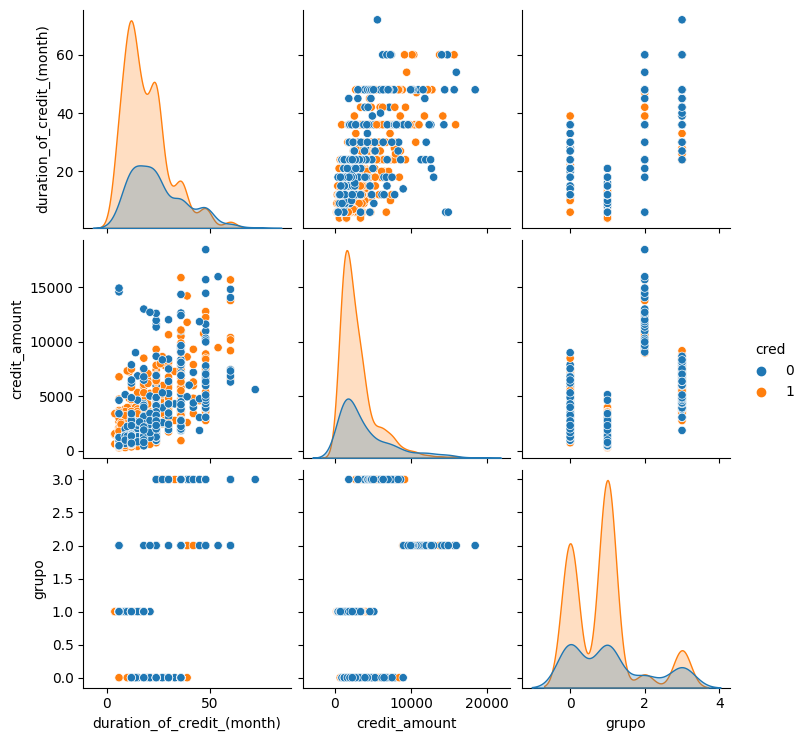

In [24]:
# construir um gráfico colorido para entender os padrões
sns.pairplot(data_clust, hue='cred')
plt.show()

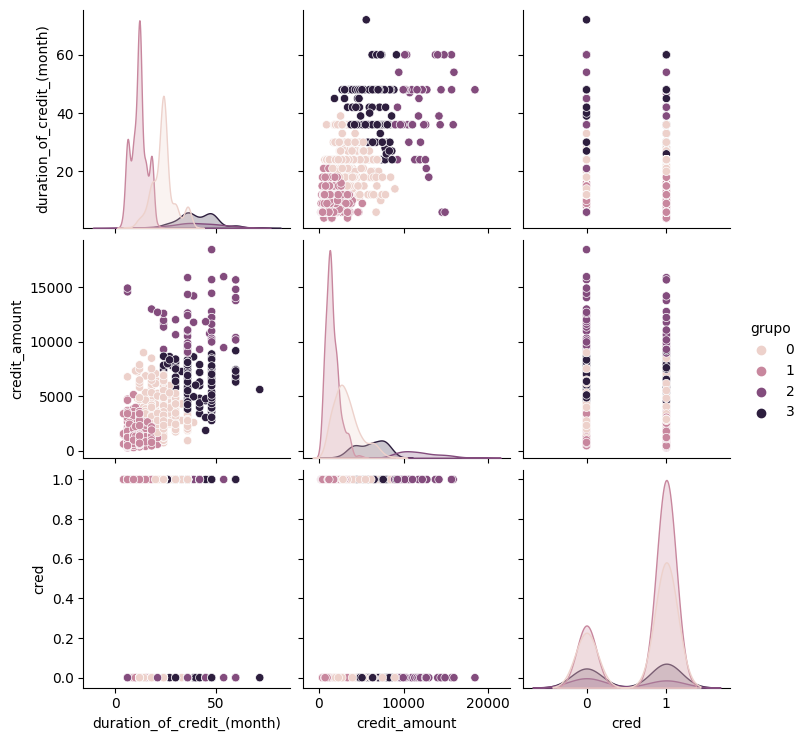

In [25]:
# construir um gráfico colorido para entender os padrões
sns.pairplot(data_clust, hue='grupo')
plt.show()